## IMPORTING LIBRARIES 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

## LOADING THE DATA

In [3]:
train_dir=r'E:\Emotion Detector\train'
validation_dir=r'E:\Emotion Detector\test'

## DATA PREPROCESSING

In [4]:
#Generating more images to train the model by rotating,zooming,scaling  and shearing the original image

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.3,
                                 zoom_range=0.3,
                                 width_shift_range=0.4,
                                 height_shift_range=0.4,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)

In [5]:

img_rows=48
img_cols=48
batch_size=32
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  color_mode='grayscale',
                                                  target_size=(img_rows,img_cols),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                            color_mode='grayscale',
                                                            target_size=(img_rows,img_cols),
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## BUILDING CNN MODEL

In [17]:
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 128)        

## TRAINING THE CNN MODEL 

In [126]:
history = model.fit(train_generator,steps_per_epoch=28709//32,epochs=30,validation_data=validation_generator,validation_steps=7178//32,verbose=1)

Epoch 1/30
897/897 [==============================] - 2299s 3s/step - loss: 1.5327 - acc: 0.3990 - val_loss: 1.4100 - val_acc: 0.4693
Epoch 2/30
897/897 [==============================] - 1717s 2s/step - loss: 1.5286 - acc: 0.4046 - val_loss: 1.3018 - val_acc: 0.5085
Epoch 3/30
897/897 [==============================] - 2598s 3s/step - loss: 1.5303 - acc: 0.4014 - val_loss: 1.3062 - val_acc: 0.5042
Epoch 4/30
897/897 [==============================] - 1003s 1s/step - loss: 1.5286 - acc: 0.4001 - val_loss: 1.3330 - val_acc: 0.4965
Epoch 5/30
897/897 [==============================] - 183s 204ms/step - loss: 1.5221 - acc: 0.4076 - val_loss: 1.3455 - val_acc: 0.4907
Epoch 6/30
897/897 [==============================] - 158s 176ms/step - loss: 1.5249 - acc: 0.4062 - val_loss: 1.2973 - val_acc: 0.5088
Epoch 7/30
897/897 [==============================] - 158s 177ms/step - loss: 1.5218 - acc: 0.4040 - val_loss: 1.3340 - val_acc: 0.4971
Epoch 8/30
897/897 [==============================] - 15

## SAVING THE MODEL WEIGHTS

In [7]:
#model.save('E:/lets_grow_more_tasks/Emotion.h5')

from tensorflow.keras.models import load_model


model = load_model("E:/lets_grow_more_tasks/Emotion.h5")

## EVALUATING THE PERFORMANCE OF MODEL

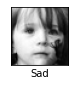

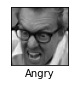

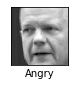

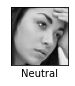

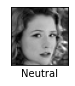

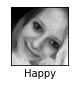

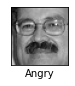

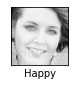

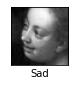

In [10]:
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

import matplotlib.pyplot as plt

%matplotlib inline


output=[]
for i in range(11,20):
    plt.subplot(1,5,1)
    plt.imshow(validation_generator[0][0][i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    output.append(classes[np.argmax(model.predict(validation_generator[0][0][i].reshape(1,48,48,1)))])
    plt.xlabel(output[-1])
    plt.show()



## PLAYING MUSIC BASED ON MOOD

In [45]:
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

import pygame

pygame.mixer.init()


def play_music(label):
    pygame.mixer.music.load("E:/lets_grow_more_tasks/{}.mp3".format(label))
    pygame.mixer.music.play()
    

        
        

## ANGRY INSTANCE

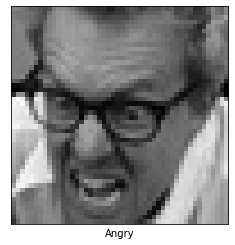

In [47]:
plt.imshow(validation_generator[0][0][12],cmap='gray')
plt.xticks([])
plt.yticks([])
label=classes[np.argmax(model.predict(validation_generator[0][0][12].reshape(1,48,48,1)))]
plt.xlabel(label)
plt.show()
play_music(label)
    

## NEUTRAL INSTANCE

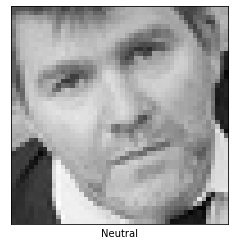

In [50]:
plt.imshow(validation_generator[0][0][1],cmap='gray')
plt.xticks([])
plt.yticks([])
label=classes[np.argmax(model.predict(validation_generator[0][0][1].reshape(1,48,48,1)))]
plt.xlabel(label)
plt.show()
play_music(label)



## HAPPY INSTANCE

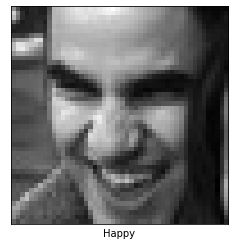

In [49]:
plt.imshow(validation_generator[4][0][30],cmap='gray')
plt.xticks([])
plt.yticks([])
label=classes[np.argmax(model.predict(validation_generator[4][0][30].reshape(1,48,48,1)))]
plt.xlabel(label)
plt.show()
play_music(label)

## SAD INSTANCE

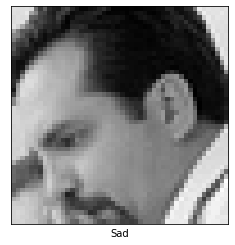

In [51]:
plt.imshow(validation_generator[10][0][8],cmap='gray')
plt.xticks([])
plt.yticks([])
label=classes[np.argmax(model.predict(validation_generator[10][0][8].reshape(1,48,48,1)))]
plt.xlabel(label)
plt.show()
play_music(label)

## SURPRISE INSTANCE

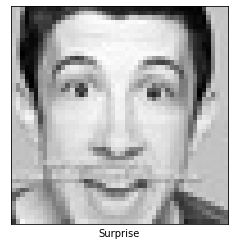

In [52]:
plt.imshow(validation_generator[30][0][0],cmap='gray')
plt.xticks([])
plt.yticks([])
label=classes[np.argmax(model.predict(validation_generator[30][0][0].reshape(1,48,48,1)))]
plt.xlabel(label)
plt.show()
play_music(label)

## FEAR  INSTANCE

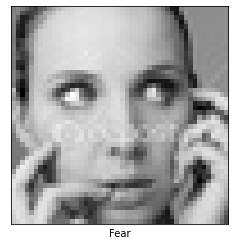

In [53]:
plt.imshow(validation_generator[81][0][10],cmap='gray')
plt.xticks([])
plt.yticks([])
label=classes[np.argmax(model.predict(validation_generator[81][0][10].reshape(1,48,48,1)))]
plt.xlabel(label)
plt.show()
play_music(label)